# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score



# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

/Users/breadcheese/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/breadcheese/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/breadcheese/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 2. Import and Read Data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
ss=pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


In [7]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
ss.shape

(418, 2)

## Assumption

In [9]:
#sample submission file in gender_submission.csv assumes 
#that all female passengers survived (and all male passengers died).

women=train.loc[train['Sex']=="female",'Survived']
rate_women=sum(women)/len(women)
print(rate_women)

0.7420382165605095


In [10]:
# how about man?
men=train.loc[train['Sex']=="male",'Survived']
rate_men=sum(men)/len(men)
print(rate_men)

0.18890814558058924


##### Almost 75% are female and 19% are male, so gender seems to be a strong indicator of survival

# 3. Data Description

In [11]:
##Survived: 0 = Did not survive, 1 = Survived

#Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

#Sex: Male or female

#Age: Age in years, fractional if less than 1

#SibSp: Number of siblings or spouses aboard the titanic

#Parch: Number of parents or children aboard the titanic

#Ticket: Passenger ticket number

#Fare: Passenger fare

#Cabin: Cabin number

#Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton""

# 4. Exploratory Data Analysis

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


###### Missing data in training set

In [14]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

#### Missing data in test set

In [15]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

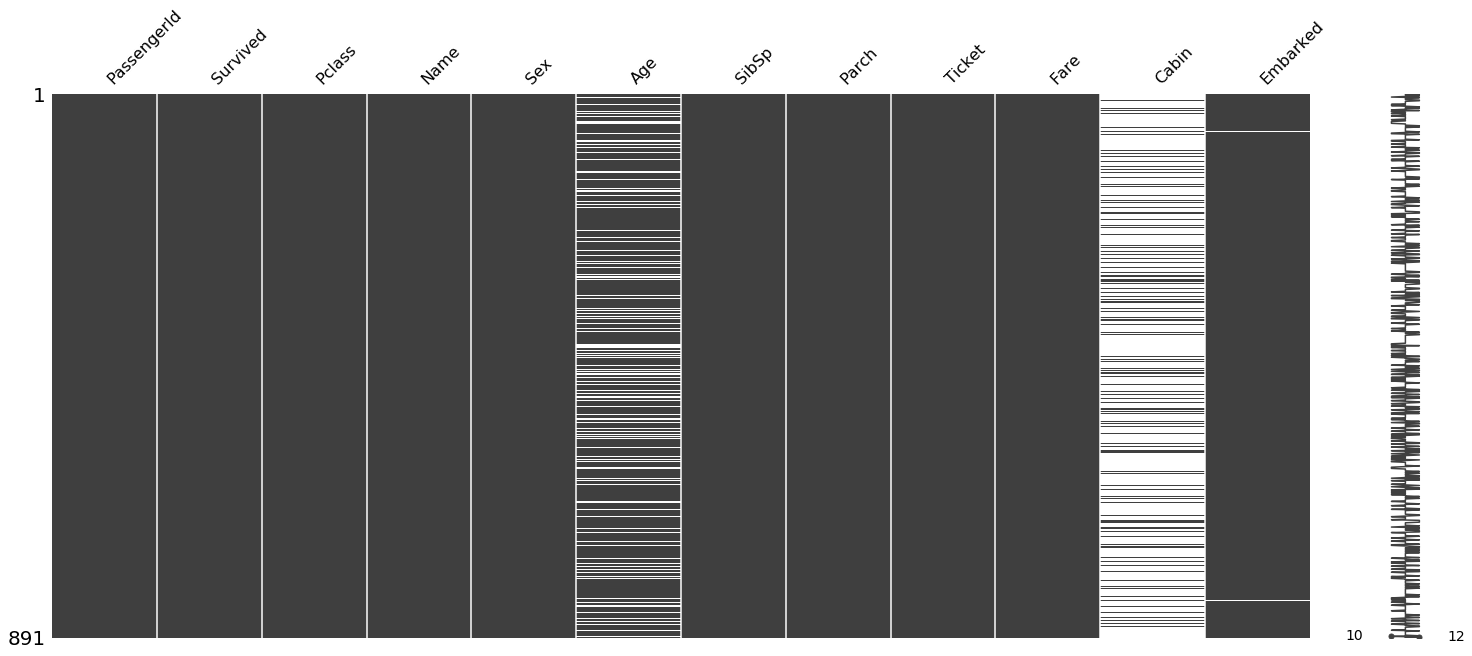

In [16]:
# Missing data in training set

missingno.matrix(train)

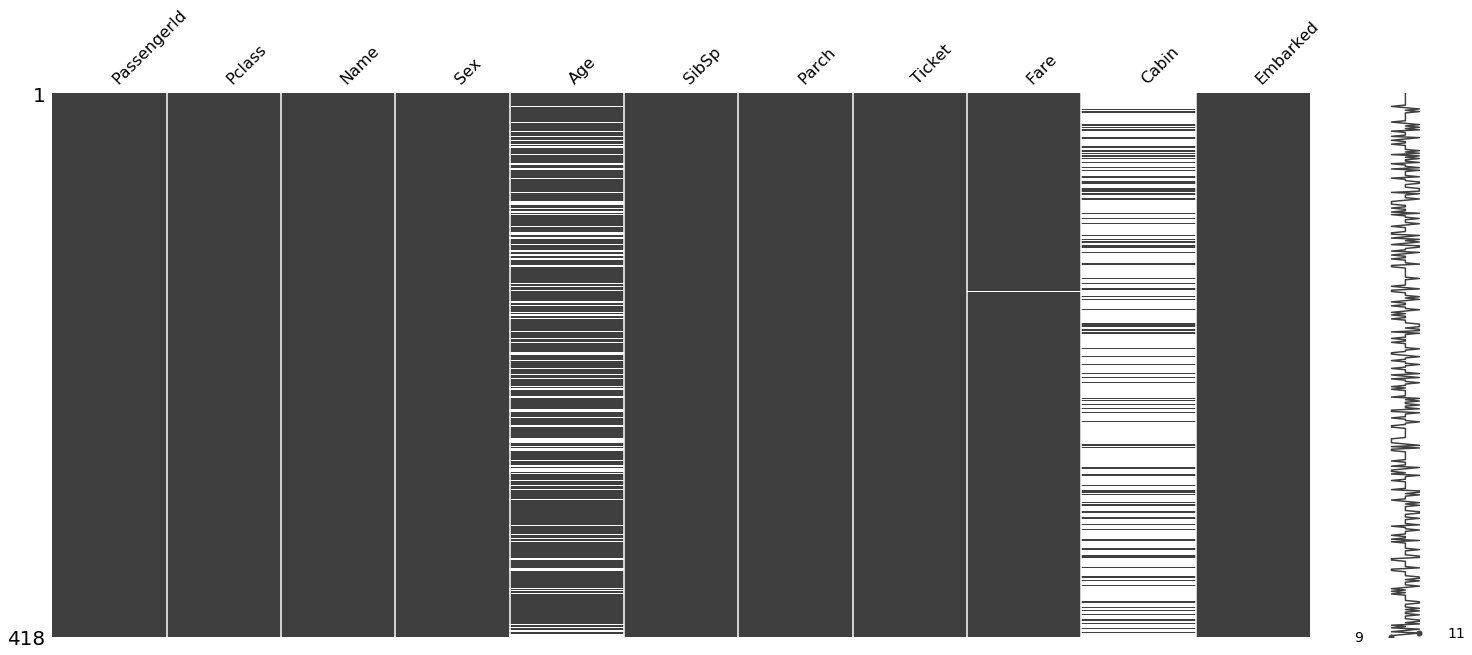

In [17]:
# Missing data in test set
missingno.matrix(test)

In [18]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Categorical Variable: Sex

In [20]:
train['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [21]:
train[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


Text(0.5, 1.0, 'Survival Probability by Gender')

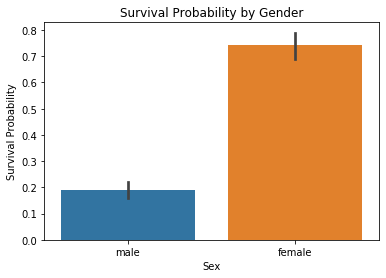

In [22]:
sns.barplot(x='Sex',y='Survived',data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

## Categorical Variable: Pclass

In [23]:
train[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


Text(0.5, 1.0, 'Survival Probability by Pclass')

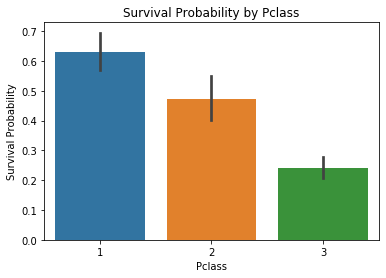

In [24]:
sns.barplot(x='Pclass',y='Survived',data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Pclass')

Text(0.5, 1, 'Survival Probability by Sex and Passenger Class')

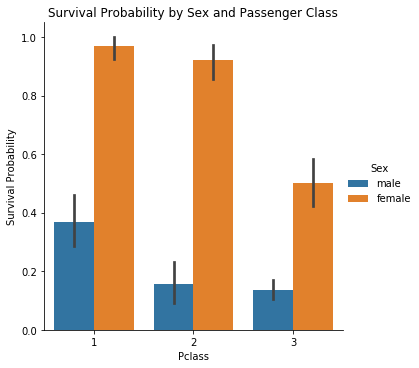

In [25]:
# Survival by gender and passenger class
g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [26]:
train['Embarked'].value_counts(dropna=False)
# two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [27]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

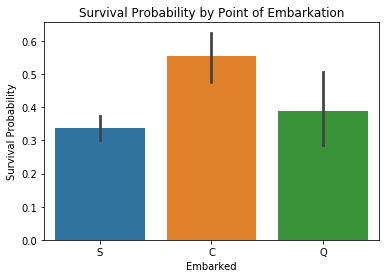

In [28]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

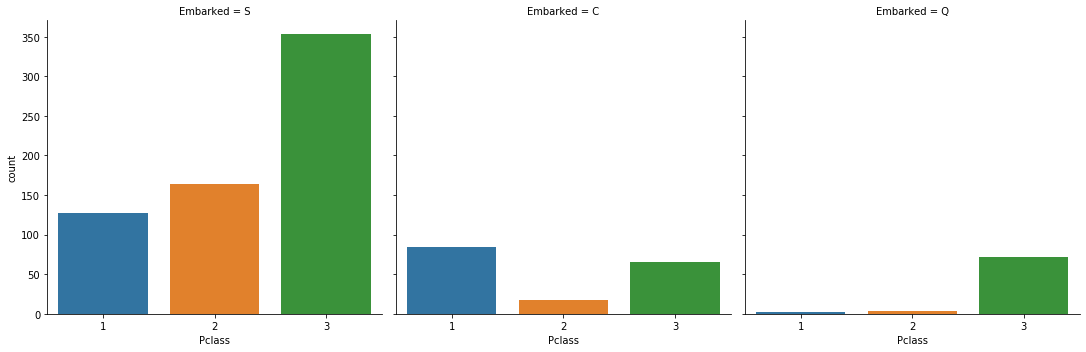

In [29]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

# Numerical Variable

## Detect and remove outliers in numerical variables

In [30]:

def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [31]:
# outlier in mumerical variaable
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [32]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


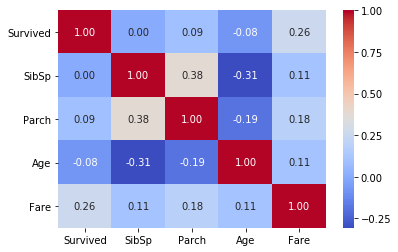

In [33]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')


In [34]:
# Value counts of the SibSp column 

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [35]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

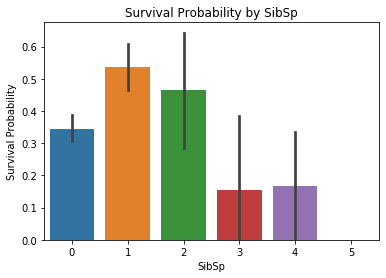

In [36]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

## Numerical Variable: Parch

In [37]:
train['Parch'].value_counts(dropna=False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [38]:
train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

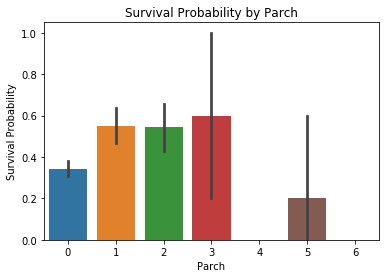

In [39]:
sns.barplot(x='Parch',y='Survived',data=train)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Parch")

## Numerical Variable: Age

In [40]:
train['Age'].isnull().sum() #Null values

#Fill N/A

170

ValueError: cannot convert float NaN to integer

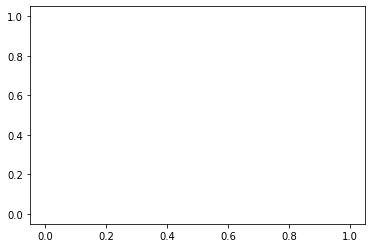

In [41]:
# Passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

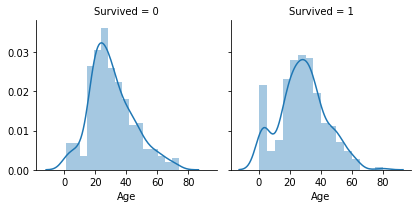

In [42]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

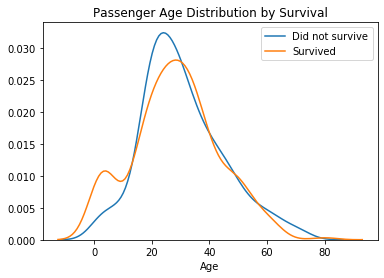

In [43]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

## Numerical Variable: Fare

In [44]:
train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

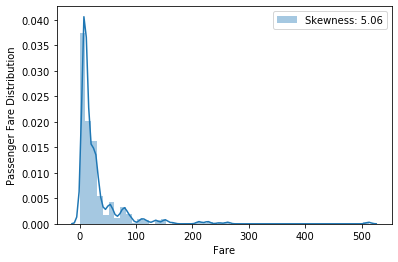

In [45]:

# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

# 5. Data Processing

In [46]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [47]:
train.isnull().sum().sort_values(ascending=False)

Age            170
Embarked         2
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [48]:
# Compute the most frequent value of Embarked in training set
mode=train['Embarked'].dropna().mode()[0]
mode

'S'

In [49]:
# Fill missing value in Embarked with mode
train['Embarked'].fillna(mode,inplace=True)

In [50]:
# Missing values in test set
test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
Embarked        0
Parch           0
SibSp           0
Sex             0
Name            0
Pclass          0
PassengerId     0
dtype: int64

In [51]:
# Compute median of Fare in test set 

median = test['Fare'].dropna().median()
median

14.4542

In [52]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

In [53]:

# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [54]:
# Missing values in the combined set
combine.isnull().sum().sort_values(ascending=False)

Survived       418
Age            256
Embarked         0
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [55]:
#Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

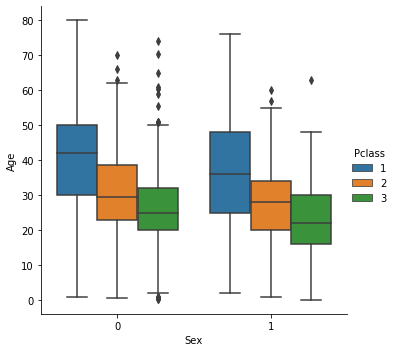

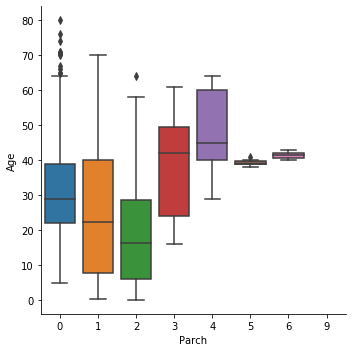

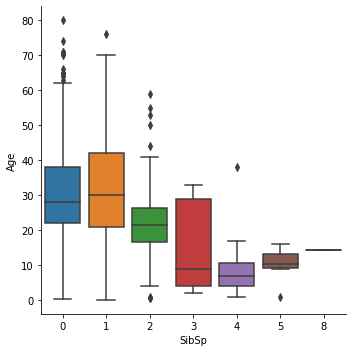

In [56]:
sns.factorplot(y="Age",x="Sex",hue='Pclass',kind='box',data=combine)
sns.factorplot(y="Age",x="Parch",kind='box',data=combine)
sns.factorplot(y='Age',x="SibSp", kind="box", data=combine)

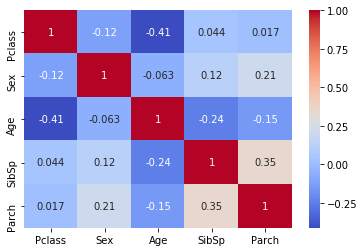

In [57]:
sns.heatmap(combine.drop(['Survived','Name','PassengerId','Fare'],axis=1).corr(),annot=True,cmap='coolwarm')
#Age is not correlated with Sex but is negatively correlated with SibSp, Parch and Pclass

In [58]:
# check number of missing ages

age_nan_indices = list(combine[combine['Age'].isnull()].index)
print(len(age_nan_indices))

256


In [59]:
#Loop through each missing age in the list to locate the rows that have the same SibSp, Parch and PClass values 
#and fill the missing age with the median of those rows. 
#@If rows are not found, simply fill the missing age with the median of the entire Age column.

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

# i don't understand

In [60]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

# 5. Data Transformation

Text(0.5, 1.0, 'Passenger Fare Distribution')

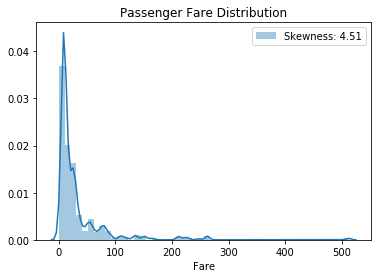

In [61]:

# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [62]:

# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

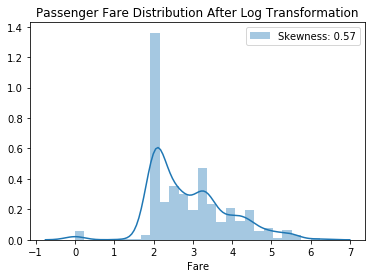

In [63]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

# 5.3 Feature Engineering

### Title

In [64]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [65]:
combine['Title']=[name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [66]:
# Value counts of Title

combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Don               1
Sir               1
Jonkheer          1
the Countess      1
Lady              1
Dona              1
Mme               1
Capt              1
Name: Title, dtype: int64

In [67]:
#number of unique title
combine['Title'].nunique()

18

In [68]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

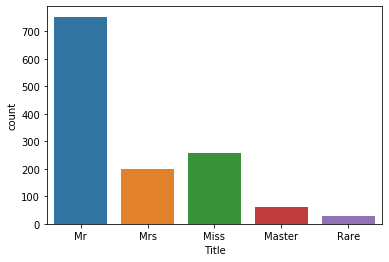

In [69]:
sns.countplot(combine['Title'])

In [70]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1, 'Mean of survival by Title')

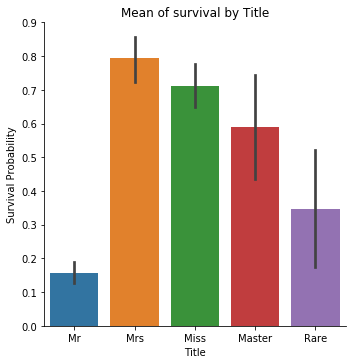

In [71]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [72]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [73]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [74]:
combine[['FamilySize','Survived']].groupby('FamilySize',as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [75]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [76]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [77]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


# 5.4 Feature Engineering

In [78]:
#Machine learning models require all input and output variables to be numeric. Therefore, 
#we need to encode all of our categorical data before we can fit the models to our data.

In [79]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


In [80]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1.981001,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,38.0,4.266662,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,26.0,2.070022,1,0,1,0,0,0,0,0,1
3,4,1.0,1,1,35.0,3.972177,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,35.0,2.085672,1,0,0,1,0,0,0,0,1


In [81]:

# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [82]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [83]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [84]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [85]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,38.0,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,26.0,1,1,0,1,0,0,0,0,0,1
3,4,1.0,1,1,35.0,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,35.0,1,1,0,0,1,0,0,0,0,1


In [86]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [87]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,38.0,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,26.0,1,1,0,1,0,0,0,0,0,1
3,4,1.0,1,1,35.0,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,35.0,1,1,0,0,1,0,0,0,0,1


In [88]:

# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,22.0,1,0,0,0,1,0,0,0,0,1
1,1.0,1,1,38.0,2,0,0,0,0,1,0,1,0,0
2,1.0,3,1,26.0,1,1,0,1,0,0,0,0,0,1
3,1.0,1,1,35.0,2,0,0,0,0,1,0,0,0,1
4,0.0,3,0,35.0,1,1,0,0,1,0,0,0,0,1


In [89]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,22.0,1,0,0,0,1,0,0,0,0,1
1,1,1,1,38.0,2,0,0,0,0,1,0,1,0,0
2,1,3,1,26.0,1,1,0,1,0,0,0,0,0,1
3,1,1,1,35.0,2,0,0,0,0,1,0,0,0,1
4,0,3,0,35.0,1,1,0,0,1,0,0,0,0,1


In [90]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,34.5,1,1,0,0,1,0,0,0,1,0
882,893,NaN,3,1,47.0,1,0,0,0,0,1,0,0,0,1
883,894,NaN,2,0,62.0,1,1,0,0,1,0,0,0,1,0
884,895,NaN,3,0,27.0,1,1,0,0,1,0,0,0,0,1
885,896,NaN,3,1,22.0,1,0,0,0,0,1,0,0,0,1


In [91]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,34.5,1,1,0,0,1,0,0,0,1,0
882,893,3,1,47.0,1,0,0,0,0,1,0,0,0,1
883,894,2,0,62.0,1,1,0,0,1,0,0,0,1,0
884,895,3,0,27.0,1,1,0,0,1,0,0,0,0,1
885,896,3,1,22.0,1,0,0,0,0,1,0,0,0,1


# 6. Modeling

In [92]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 13)
Y_train shape:  (881,)
X_test shape:  (418, 13)


## 6.2 Fit model and data and make prediction

## 6.2.1 Logistic Regression

In [93]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.82

## 6.2.2 Support Vector Machines

In [94]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.65

## 6.2.3 K-nearest Neighbors

In [95]:

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.68

## 6.2.4 Gaussian Naive Bayes

In [96]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.89

## 6.2.5 Perception

In [97]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

65.38

## 6.2.6 Linear SVC

In [98]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

76.96

## 6.2.7 Stochastic gradient descent

In [99]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.14

## 6.2.8 Decision Tree

In [100]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

94.21

## 6.2.9 Random Forest

In [101]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

94.21

# 6.3 Model Evaluation

## Training Accuracy

In [102]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,94.21
1,Decision Tree,94.21
2,KNN,84.68
3,Support Vector Machines,83.65
4,Logistic Regression,80.82
5,Stochastic Gradient Decent,80.14
6,Naive Bayes,78.89
7,Linear SVC,76.96
8,Perceptron,65.38


## K-fold cross validation

In [103]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [104]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870744	total: 57.6ms	remaining: 57.6s
1:	learn: 0.6806472	total: 60.2ms	remaining: 30s
2:	learn: 0.6740302	total: 61.7ms	remaining: 20.5s
3:	learn: 0.6680155	total: 62.8ms	remaining: 15.6s
4:	learn: 0.6623416	total: 64ms	remaining: 12.7s
5:	learn: 0.6562114	total: 65.3ms	remaining: 10.8s
6:	learn: 0.6499410	total: 67.2ms	remaining: 9.53s
7:	learn: 0.6447255	total: 69.1ms	remaining: 8.57s
8:	learn: 0.6397686	total: 70.6ms	remaining: 7.77s
9:	learn: 0.6365193	total: 71.6ms	remaining: 7.09s
10:	learn: 0.6316526	total: 73ms	remaining: 6.56s
11:	learn: 0.6259527	total: 74.4ms	remaining: 6.12s
12:	learn: 0.6215014	total: 75.7ms	remaining: 5.74s
13:	learn: 0.6167818	total: 77ms	remaining: 5.42s
14:	learn: 0.6112474	total: 78.3ms	remaining: 5.14s
15:	learn: 0.6062311	total: 79.5ms	remaining: 4.89s
16:	learn: 0.6027855	total: 80.7ms	remaining: 4.67s
17:	learn: 0.5986394	total: 82.1ms	remaining: 4.48s
18:	learn: 0.5943232	total: 84ms	remaining: 4.34s
19

In [105]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [106]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.842237,0.033432,CatBoost
1,0.808235,0.032626,Decision Tree
2,0.804775,0.048387,Support Vector Machines
3,0.803716,0.034571,Random Forest
4,0.802477,0.035743,Logistic Regression
5,0.790028,0.040316,KNN
6,0.786606,0.043946,Gausian Naive Bayes
7,0.777681,0.069643,Linear SVC
8,0.758274,0.048491,Perceptron
9,0.587883,0.145368,Stochastic Gradient Descent


Text(0.5, 1.0, 'Cross Validation Scores')

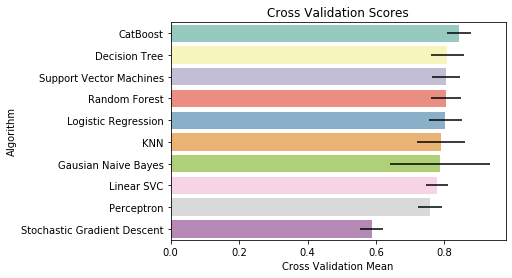

In [107]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

# Preparing Data for Submission

In [108]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [109]:
ss.shape

(418, 2)

In [110]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,1
885,896,1


In [111]:
# Create and save excel file 

submit.to_csv(r'/Users/breadcheese/Desktop/submission.csv', index = False)
